In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('scrubbed.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 10, 11], low_memory=False)
df.head()

Unnamed: 0        datetime                  city    state  country  \
0           0  10/10/49 20:30            San Marcos       TX       US   
1           1  10/10/49 21:00          Lackland Afb       TX  UNKNOWN   
2           2  10/10/55 17:00  Chester (Uk/England)  UNKNOWN       GB   
3           3  10/10/56 21:00                  Edna       TX       US   
4           4  10/10/60 20:00               Kaneohe       HI       US   

      shape  duration   latitude   longitude  
0  cylinder    2700.0  29.883056  -97.941111  
1     light    7200.0  29.384210  -98.581082  
2    circle      20.0  53.200000   -2.916667  
3    circle      20.0  28.978333  -96.645833  
4     light     900.0  21.418056 -157.803611

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
# df.insert(1, 'year', df['datetime'].dt.year)
df['year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour
df['year'] = df['year'].fillna(0).astype(int)
df['hour'] = df['hour'].fillna(0).astype(int)
df['city'] = df['city'].str.title()
df['state'] = df['state'].str.upper()
df['country'] = df['country'].str.upper()
df['shape'] = df['shape'].str.title()
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

us_states = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

# shape_focus = np.asarray(['light','triangle', 'circle'])
# df = df[df['shape'].isin(shape_focus)].sort_values('year')

# UFO sightings in United States only (70,805 rows)
# df = df[df['state'].isin(us_states)].sort_values('year')
# df = df[df['shape'].str.contains('\(0\)|\(Cigar\)|\(Cylinder\)|\(Chevron\)') == False]
# df = df[(df.latitude > 15) & (df.longitude < -65)]
# df = df[(df.latitude > 50) & (df.longitude > -125) == False]
# df = df[df['city'].str.contains('\(Canada\)|\(Mexico\)') == False]

In [4]:
df.describe()

Unnamed: 0      duration     latitude    longitude         year  \
count  5387.000000  5.387000e+03  5381.000000  5387.000000  5387.000000   
mean   2693.000000  2.120073e+04    37.580301   -86.509347  1974.891962   
std    1555.237281  1.336268e+06    10.471502    37.775559   242.771065   
min       0.000000  0.000000e+00   -46.163992  -162.596667     0.000000   
25%    1346.500000  1.500000e+01    34.068611  -111.158086  2000.000000   
50%    2693.000000  1.200000e+02    38.982222   -87.738611  2006.000000   
75%    4039.500000  6.000000e+02    42.358333   -78.772083  2011.000000   
max    5386.000000  9.783600e+07    70.292489   178.017649  2066.000000   

              hour  
count  5387.000000  
mean     15.207351  
std       7.570775  
min       0.000000  
25%       9.000000  
50%      19.000000  
75%      21.000000  
max      23.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 11 columns):
Unnamed: 0    5387 non-null int64
datetime      5307 non-null datetime64[ns]
city          5387 non-null object
state         5387 non-null object
country       5387 non-null object
shape         5387 non-null object
duration      5387 non-null float64
latitude      5381 non-null float64
longitude     5387 non-null float64
year          5387 non-null int64
hour          5387 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 463.0+ KB


In [6]:
# count each state's ufo sighting times
df["state"].value_counts()

CA         563
UNKNOWN    351
TX         306
FL         259
WA         253
NY         237
AZ         183
OH         175
PA         171
NC         157
IL         156
CO         135
OR         121
MI         119
TN         106
MO         105
VA         102
SC          97
IN          97
ON          96
GA          94
WI          93
NJ          84
MA          82
MN          72
MD          69
NV          67
OK          64
CT          63
UT          62
          ... 
NH          39
WV          35
ID          35
BC          35
AK          31
MT          30
MS          28
NE          24
HI          22
RI          20
SD          19
AB          17
VT          16
WY          12
QC          10
NB           9
MB           9
ND           8
DE           8
SK           8
NS           7
PQ           6
PR           3
NF           3
DC           3
SA           2
YT           1
YK           1
NT           1
VI           1
Name: state, Length: 68, dtype: int64

In [7]:
# show the current information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 11 columns):
Unnamed: 0    5387 non-null int64
datetime      5307 non-null datetime64[ns]
city          5387 non-null object
state         5387 non-null object
country       5387 non-null object
shape         5387 non-null object
duration      5387 non-null float64
latitude      5381 non-null float64
longitude     5387 non-null float64
year          5387 non-null int64
hour          5387 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 463.0+ KB


### What is UFO sightings on the whole US map like?

From this map, we can see that there are more UFO sightings have been reported near the west coast and the north coast. The UFOs appear less in the central region.

In [8]:
# draw the distribution of UFO sightings on the whole US map
df['text'] = df[df.year > 0]['datetime'].dt.strftime('%B %-d, %Y')

data = [dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df[df.year > 0]['longitude'],
        lat = df[df.year > 0]['latitude'],
        text = df[df.year > 0]['text'],
        mode = 'markers',
        marker = dict(
            size = 5.5,
            opacity = 0.75,
            color = 'rgb(244, 158, 66)',
            line = dict(color = 'rgb(255, 255, 255)', width = 1))
        )]

layout = dict(
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             showland = True,
             landcolor = 'rgb(206, 224, 224)',
             subunitwidth = 1,
             subunitcolor = 'white',
             countrywidth = 1,
             countrycolor = 'rgb(212, 244, 244)',
             showlakes = True,
             lakecolor = 'rgb(146, 221, 220)')
        )

figure = dict(data = data, layout = layout)
iplot(figure)

# Density plots

From this density plot, we can know that ufo sighting reaches its peak around 2000.

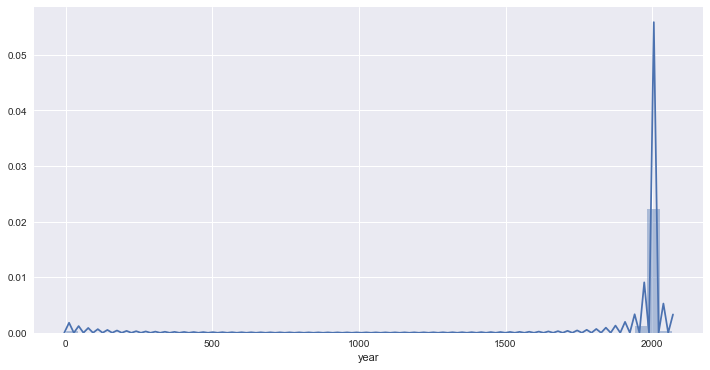

In [9]:
sns.distplot(df['year'])
plt.show()

From this density plot, we see that most UFO sightings were reported at night, around 20 o'clock. UFOs seldom appear during the day.

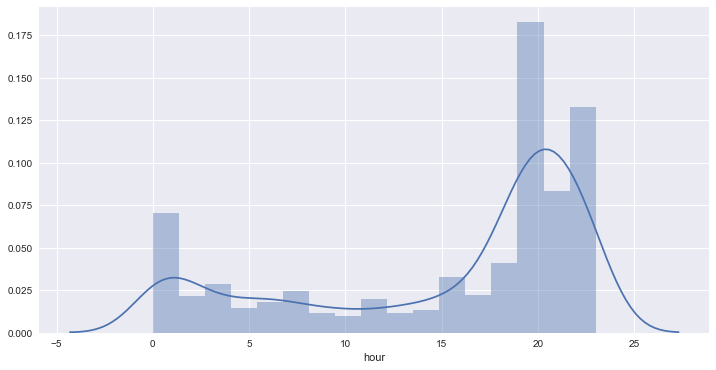

In [10]:
sns.distplot(df['hour'])
plt.show()

From this density plot, we can know that most ufo sightings have been reported between [-100, -70] longitude.

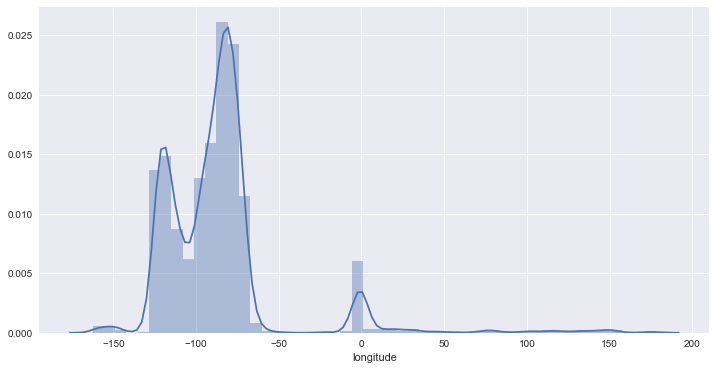

In [11]:
sns.distplot(df['longitude'])
plt.show()

From this bar plot, we can see that there are also some ufo sightings reported in Canada, Britain and Austrilia in this dataset.

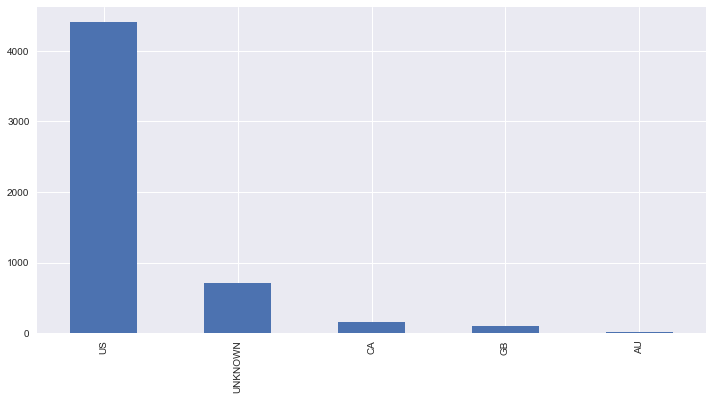

In [12]:
countries = df['country']
country_count = countries.value_counts()
country_count[:5].plot(kind='bar')
plt.show()

### Which states have reported the most UFO sightings in the past century?

From this bar plot, we can see that top 3 states that reported most ufo sightings are CA, TX and FL. And the time in CA is double of the second one. And there are more than 300 UFO sightsings were marked with unknown location.

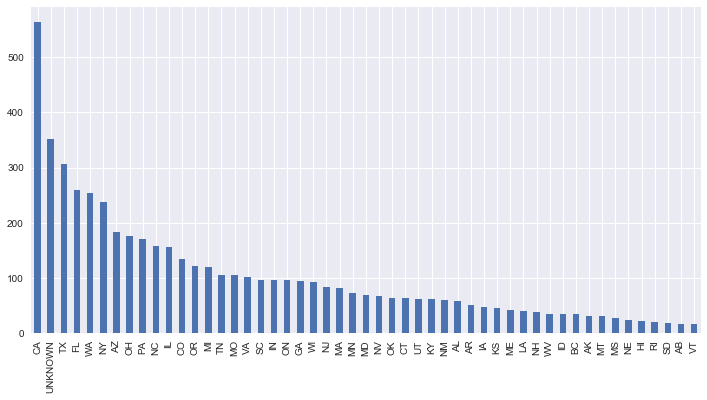

In [13]:
# draw the barplot of the first 20 states' ufo sightings times
states = df['state']
state_count = states.value_counts()
state_count[:51].plot(kind='bar')
plt.show()

We can see it more clearly through the below map plot. The greener state means that there are more UFO sightings in this state.

In [14]:
# UFO sightings per state
ufo_perstate = np.asarray(df.groupby('state').state.count())

ufo_scale = [[0, 'rgb(240, 240, 240)'], [1, 'rgb(0, 163, 81)']]

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = ufo_scale,
        showscale = False,
        locations = us_states,
        locationmode = 'USA-states',
        z = ufo_perstate,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            )
        )]

layout = dict(
         title = 'UFO Reports by State in United States',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
        )

figure = dict(data = data, layout = layout)
iplot(figure)

### Which shape of UFO has been reported most?

From this barplot, we know that the light UFO has been reported most. The second and third one is shape in triangle and circle. There are also many unknown shapes UFOs.

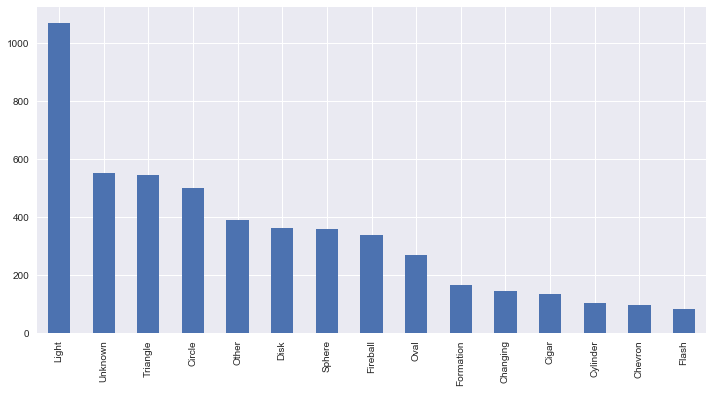

In [15]:
# draw the barplot of different shapes' ufo sightings times
shapes = df['shape']
shape_count = shapes.value_counts()
shape_count[:15].plot(kind='bar')
plt.show()

### What is the trend of UFO sightings reports in the past century like?

From this line chart, we can see that reports of UFO sightings have suddenly increased around 1995. And it has skyrocketed in the past 20 years — rising from less than 100 in 1994 to more than 400 in 2013.

In [18]:
# UFO sightings per year
ufo_peryear = np.asarray(df[df.year > 0].groupby('year').year.count())

ufo_years = np.asarray(df[df.year > 0].year.unique())

In [19]:
trace = [go.Scatter(
         x = ufo_years,
         y = ufo_peryear,
         mode = 'lines',
         line = dict(
             color = 'rgb(0, 163, 81)',
             width = 3)
         )]

layout = go.Layout(
         title = 'UFO Reports by Year in United States (1967-2013)',
         xaxis = dict(
             range = [1967, 2013],
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             range = [0, 600],
             showline = True,
             showgrid = False)
         )

figure = dict(data = trace, layout = layout)
iplot(figure)

### Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

From these statistics, we can know that
1) There are 3139 different cities that have reported UFO sightings;
2) There are most UFO sightings reports in Seattle among all cities, 42 in total;
3) There are most UFO sightings reports in CA among all states, 563 in total;
4) Most of UFOs are light, 1070 in total;
5) The mean duration of all UFOs is 1846.927 seconds, about 30 minutes

In [21]:
# find the summary statistics for each column
df.describe(include='all')

Unnamed: 0             datetime     city state country  shape  \
count   5387.000000                 5307     5387  5387    5387   5387   
unique          NaN                 4577     3139    68       6     22   
top             NaN  2005-10-01 01:00:00  Seattle    CA      US  Light   
freq            NaN                   11       42   563    4403   1070   
first           NaN  1967-10-01 02:00:00      NaN   NaN     NaN    NaN   
last            NaN  2066-10-21 22:15:00      NaN   NaN     NaN    NaN   
mean    2693.000000                  NaN      NaN   NaN     NaN    NaN   
std     1555.237281                  NaN      NaN   NaN     NaN    NaN   
min        0.000000                  NaN      NaN   NaN     NaN    NaN   
25%     1346.500000                  NaN      NaN   NaN     NaN    NaN   
50%     2693.000000                  NaN      NaN   NaN     NaN    NaN   
75%     4039.500000                  NaN      NaN   NaN     NaN    NaN   
max     5386.000000                  NaN      NaN   NaN     NaN    NaN   

            duration     latitude    longitude         year         hour  \
count   5.387000e+03  5381.000000  5387.000000  5387.000000  5387.000000   
unique           NaN          NaN          NaN          NaN          NaN   
top              NaN          NaN          NaN          NaN          NaN   
freq             NaN          NaN          NaN          NaN          NaN   
first            NaN          NaN          NaN          NaN          NaN   
last             NaN          NaN          NaN          NaN          NaN   
mean    2.120073e+04    37.580301   -86.509347  1974.891962    15.207351   
std     1.336268e+06    10.471502    37.775559   242.771065     7.570775   
min     0.000000e+00   -46.163992  -162.596667     0.000000     0.000000   
25%     1.500000e+01    34.068611  -111.158086  2000.000000     9.000000   
50%     1.200000e+02    38.982222   -87.738611  2006.000000    19.000000   
75%     6.000000e+02    42.358333   -78.772083  2011.000000    21.000000   
max     9.783600e+07    70.292489   178.017649  2066.000000    23.000000   

                   text  
count              5307  
unique              621  
top     October 1, 2006  
freq                 58  
first               NaN  
last                NaN  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

# Box-Plot

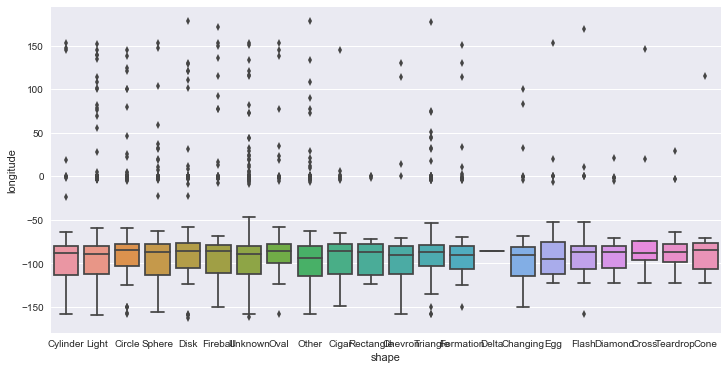

In [27]:
sns.boxplot(x="shape", y="longitude", data=df)
plt.show()

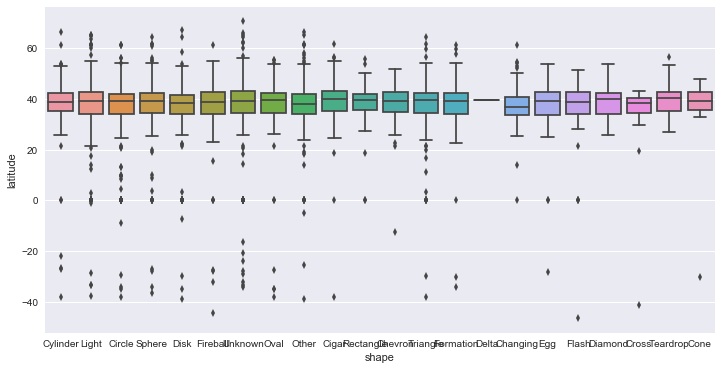

In [28]:
sns.boxplot(x="shape", y="latitude", data=df)
plt.show()

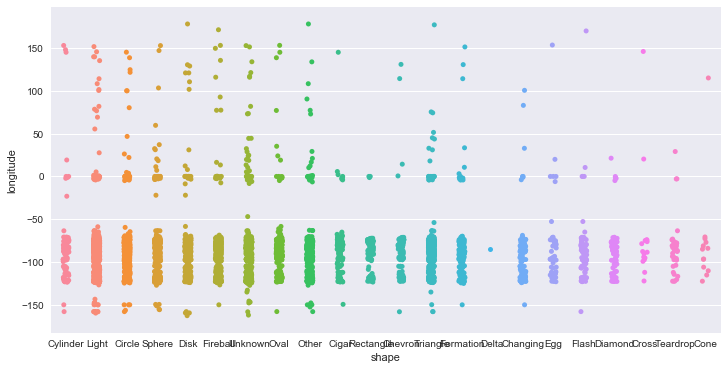

In [29]:
sns.stripplot(x="shape", y="longitude", data=df, jitter=True)
plt.show()

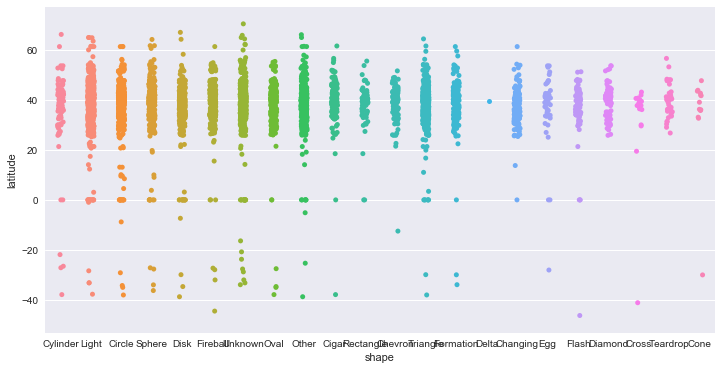

In [30]:
sns.stripplot(x="shape", y="latitude", data=df, jitter=True)
plt.show()

# Bar charts

From this bar chart, we see that there are more than 500 UFO sightings reported in California. And there are 6 states that have reported more than 200 UFO sightings.

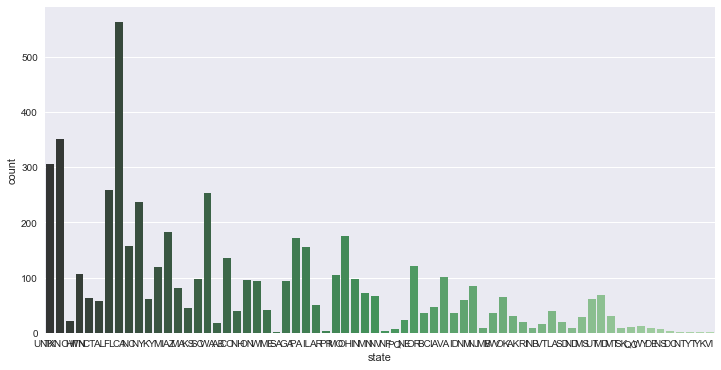

In [34]:
sns.countplot(x="state", data=df, palette="Greens_d")
plt.show()

From this count plot, we see that light UFOs appeared most frequently, more than 1000 times in total. Least amount of UFO sightings is in shape of delta.

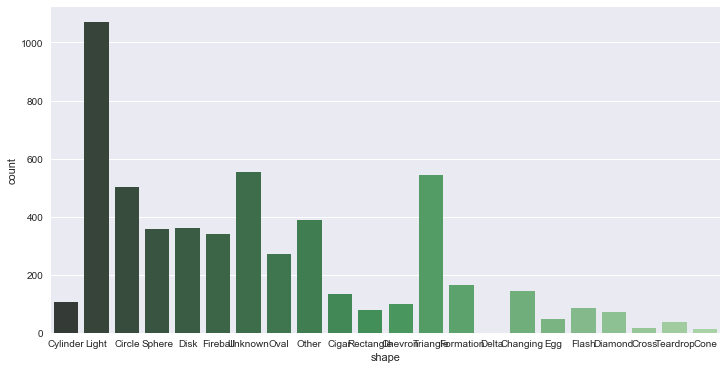

In [37]:
sns.countplot(x="shape", data=df, palette="Greens_d")
plt.show()

# Visualizing linear relationships

From this plot, we can see that the latitude scope of UFO sightings has instantly expanded over time. There were UFOs appearing in some new locations.

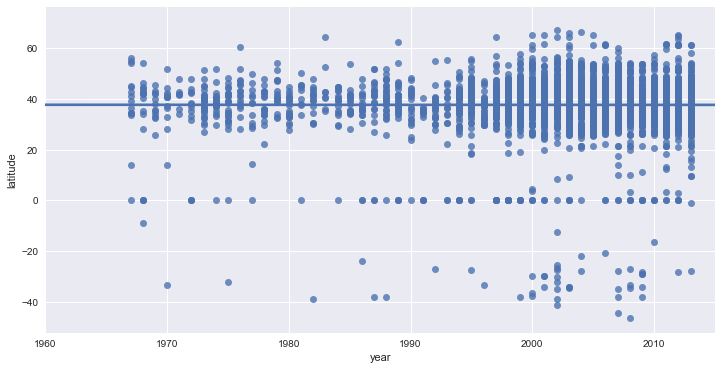

In [38]:
sns.regplot(x="year", y="latitude", data=df)
plt.xlim(1960,2015)
plt.show()

In a similar way with last plot, this plot shows that the longitude scope of UFO sightings has instantly expanded over time. There were UFOs appearing in some new locations.

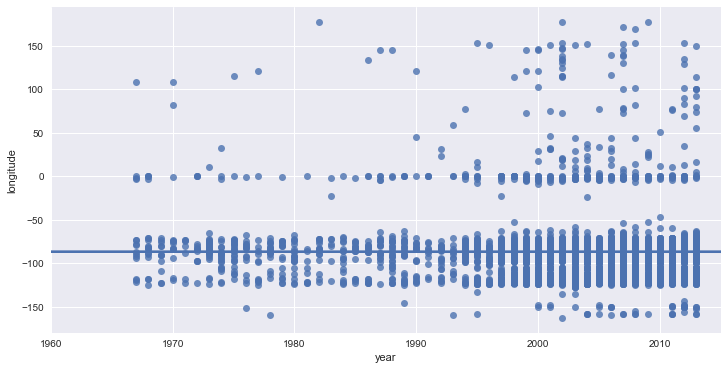

In [39]:
sns.regplot(x="year", y="longitude", data=df)
plt.xlim(1960,2015)
plt.show()

From this plot, we can see that most UFOs appears around (-100, 40). The amount of UFO sightings increases when longitude decreases and latitude increases. It means that there were more UFOs when the location moves towards northwest.

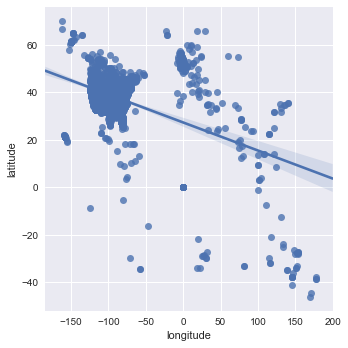

In [29]:
sns.lmplot(x="longitude", y="latitude", data=df)
plt.show()